In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../data/nifty50_daily.csv")



df.head()


,date,open,high,low,close,volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,0


In [3]:
df["date"] = pd.to_datetime(df["date"])
df.sort_values("date", inplace=True)

df.head()


,date,open,high,low,close,volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,0


In [4]:
df["log_return"] = np.log(df["close"] / df["close"].shift(1))

df.dropna(inplace=True)

df[["date", "close", "log_return"]].head()


,date,close,log_return
1,2010-01-05,5277.899902,0.008696
2,2010-01-06,5281.799805,0.000739
3,2010-01-07,5263.100098,-0.003547
4,2010-01-08,5244.750000,-0.003493
5,2010-01-11,5249.399902,0.000886


In [5]:
window = 21  # 21 trading days ~ 1 month

df["rolling_volatility"] = (
    df["log_return"]
    .rolling(window)
    .std()
    * np.sqrt(252)
)

df[["date", "rolling_volatility"]].head(25)


,date,rolling_volatility
1,2010-01-05,NaN
2,2010-01-06,NaN
3,2010-01-07,NaN
4,2010-01-08,NaN
5,2010-01-11,NaN
6,2010-01-12,NaN
7,2010-01-13,NaN
8,2010-01-14,NaN
9,2010-01-15,NaN
10,2010-01-18,NaN


In [6]:
df["cumulative_return"] = (1 + df["log_return"]).cumprod()
df["rolling_max"] = df["cumulative_return"].cummax()
df["drawdown"] = df["cumulative_return"] / df["rolling_max"] - 1

df[["date", "drawdown"]].head()


,date,drawdown
1,2010-01-05,0.000000
2,2010-01-06,0.000000
3,2010-01-07,-0.003547
4,2010-01-08,-0.007027
5,2010-01-11,-0.006147


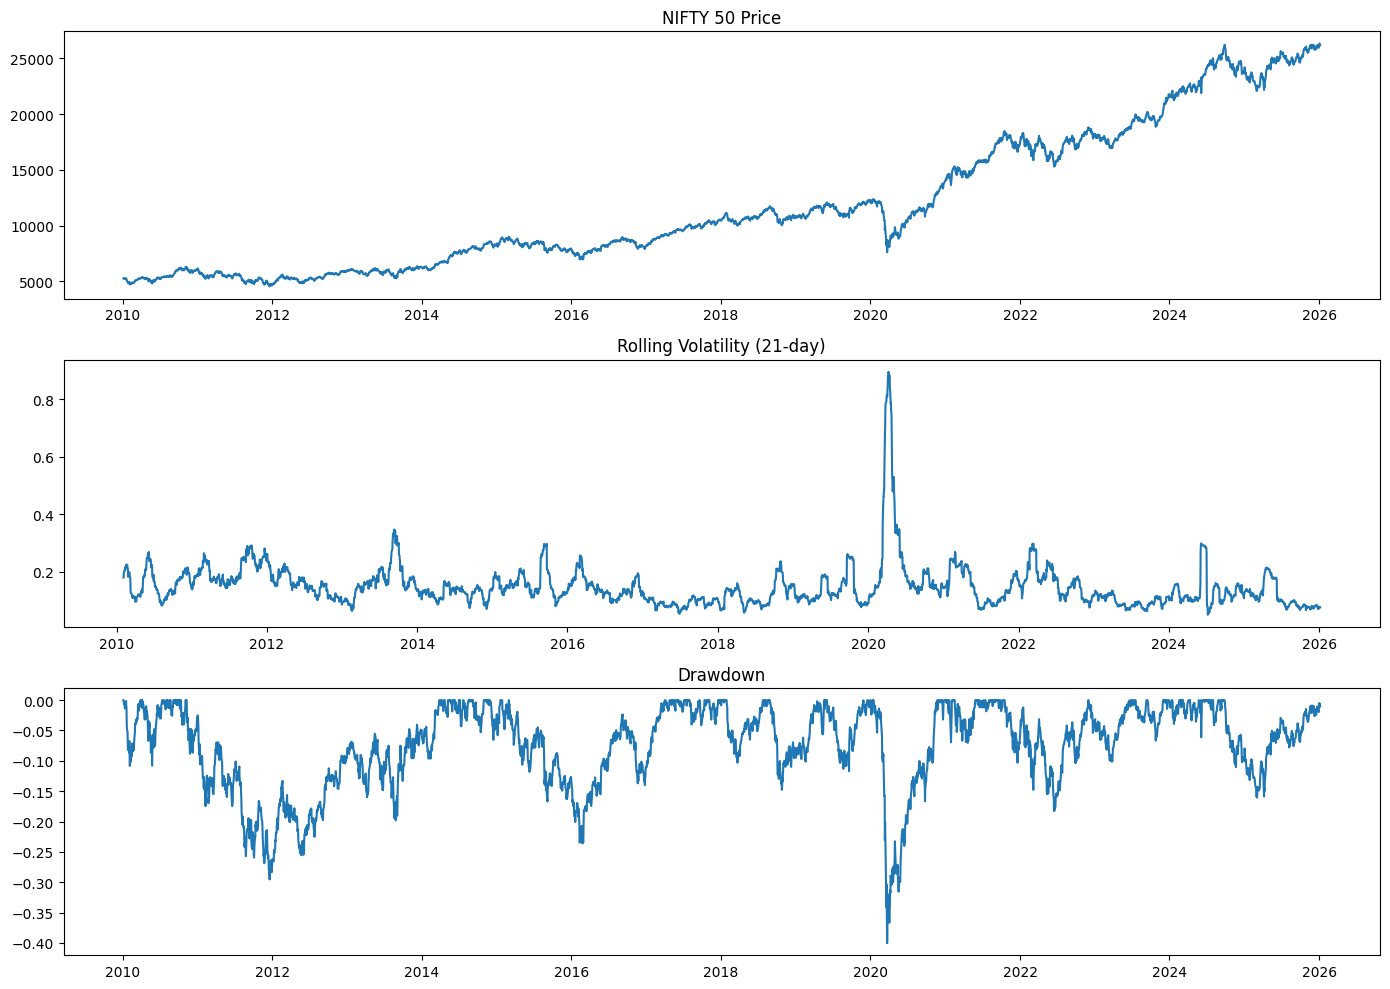

In [7]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(df["date"], df["close"])
plt.title("NIFTY 50 Price")

plt.subplot(3, 1, 2)
plt.plot(df["date"], df["rolling_volatility"])
plt.title("Rolling Volatility (21-day)")

plt.subplot(3, 1, 3)
plt.plot(df["date"], df["drawdown"])
plt.title("Drawdown")

plt.tight_layout()
plt.show()
